# Analysis after cleaning

After the cleaning phase, an analysis will be conducted to evaluate how the dataset was affected

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("cleaned_data.csv")

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 96025 rows and 31 columns


After the cleaning phase, the dataset was reduced from 132,382 to 96,025 rows, and from 37 to 31 columns.

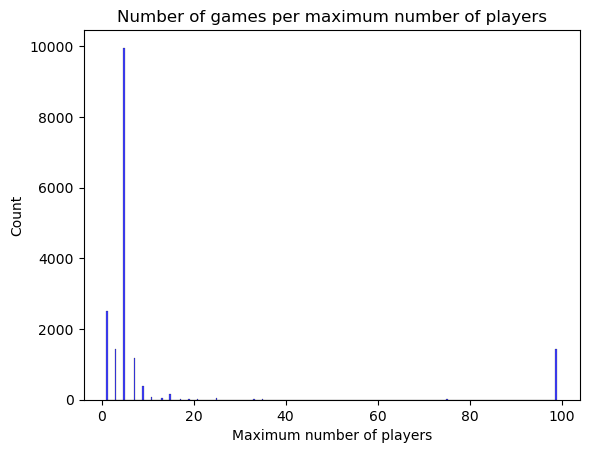

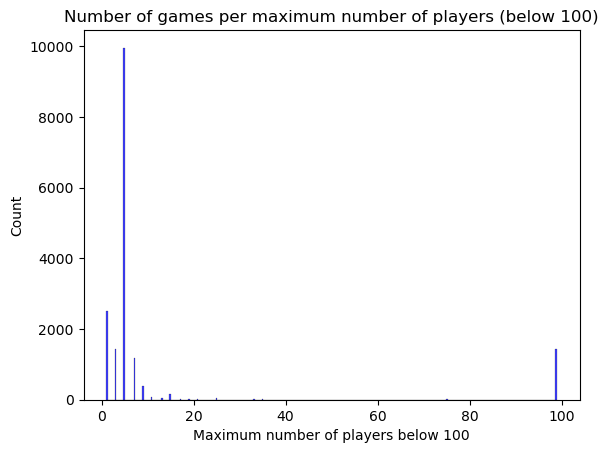

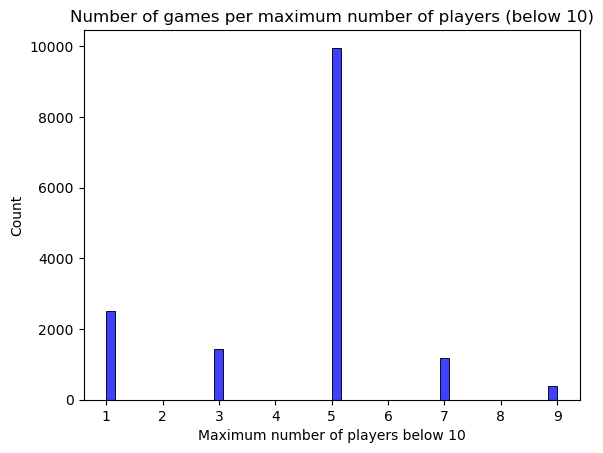

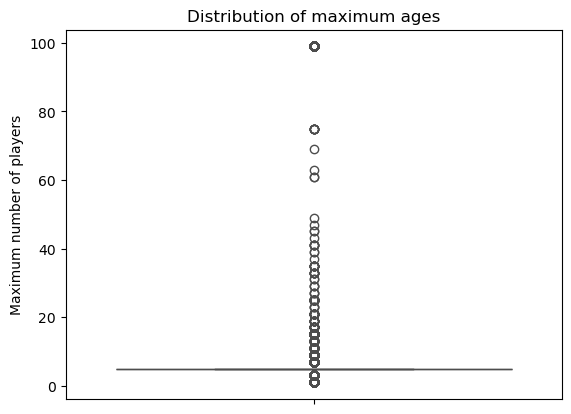

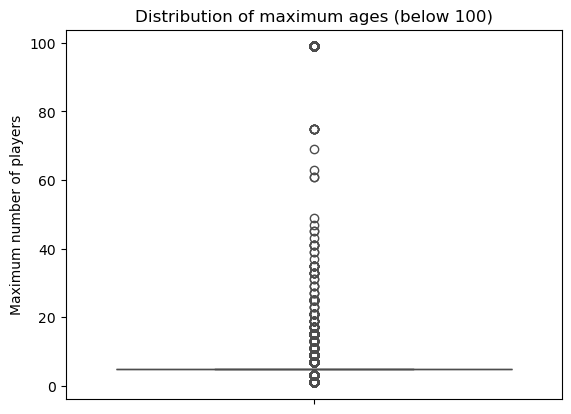

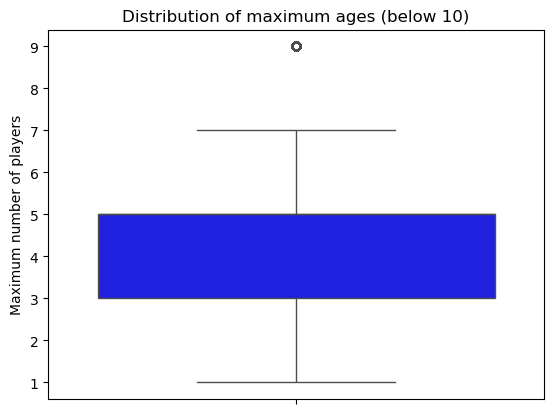

The game with the biggest maximum amount of players has 99 players


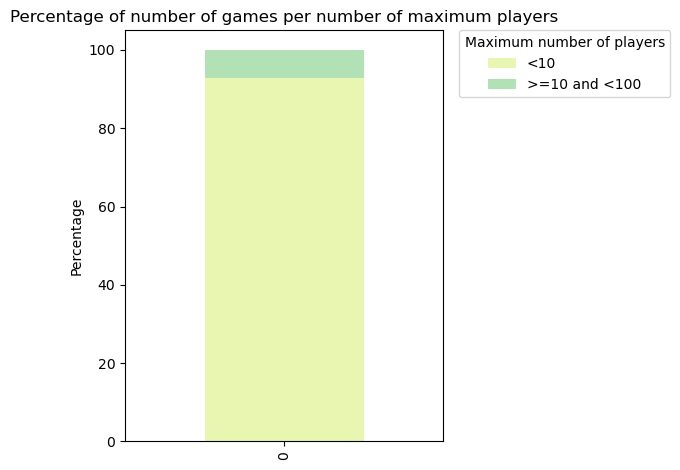

In [47]:
max_players_non_null = df.loc[df["maxplayers"].notna() & df["maxplayers"] != 0]
max_players_below_100 = max_players_non_null.loc[max_players_non_null["maxplayers"] < 100]
max_players_below_10 = max_players_non_null.loc[max_players_non_null["maxplayers"] < 10]

sb.histplot(max_players_non_null, x = "maxplayers", color="blue")
plt.xlabel("Maximum number of players")
plt.ylabel("Count")
plt.title("Number of games per maximum number of players")
plt.show()

sb.histplot(max_players_below_100, x = "maxplayers", color="blue")
plt.xlabel("Maximum number of players below 100")
plt.ylabel("Count")
plt.title("Number of games per maximum number of players (below 100)")
plt.show()

sb.histplot(max_players_below_10, x = "maxplayers", color="blue")
plt.xlabel("Maximum number of players below 10")
plt.ylabel("Count")
plt.title("Number of games per maximum number of players (below 10)")
plt.show()

sb.boxplot(max_players_non_null, y = "maxplayers", color = "blue")
plt.ylabel("Maximum number of players")
plt.title("Distribution of maximum ages")
plt.show()

sb.boxplot(max_players_below_100, y = "maxplayers", color = "blue")
plt.ylabel("Maximum number of players")
plt.title("Distribution of maximum ages (below 100)")
plt.show()

sb.boxplot(max_players_below_10, y = "maxplayers", color = "blue")
plt.ylabel("Maximum number of players")
plt.title("Distribution of maximum ages (below 10)")
plt.show()

counts = pd.Series({
    "<10": (df["maxplayers"] < 10).sum(),
    ">=10 and <100": ((df["maxplayers"] >= 10) & (df["maxplayers"] < 100)).sum()
})
percentages = counts / counts.sum() * 100
max_players_percentage =  pd.DataFrame([percentages])
max_players_percentage.plot(
    kind="bar", stacked=True, color=sb.color_palette("YlGnBu")
)
plt.ylabel("Percentage")
plt.title("Percentage of number of games per number of maximum players")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title = "Maximum number of players")
plt.tight_layout()

print(f'The game with the biggest maximum amount of players has {max(max_players_non_null["maxplayers"])} players')

The column 'yearpublished' has 0 missing values.
The column 'yearpublished' has 0 values after 2025. This means these games were not released for now.


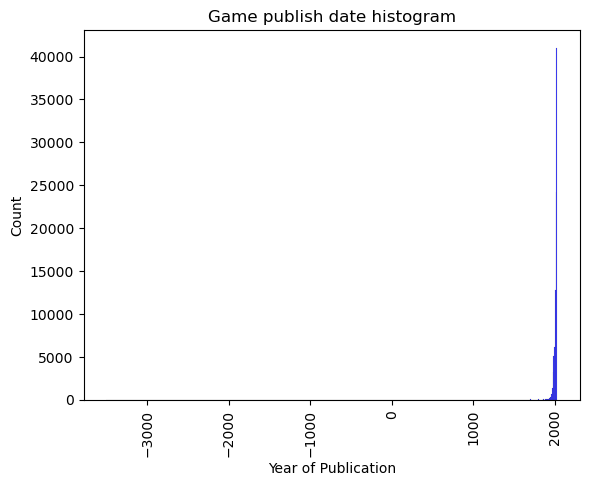

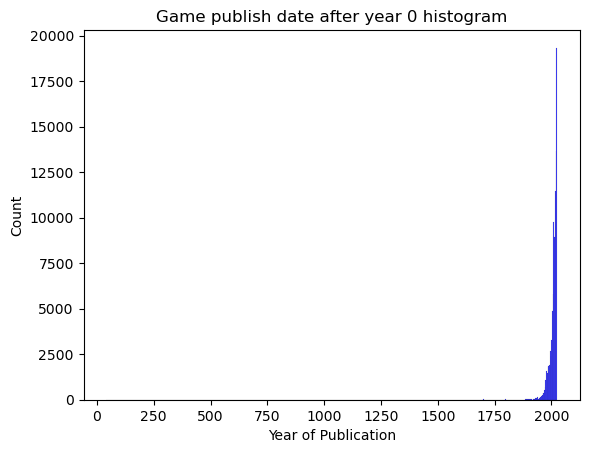

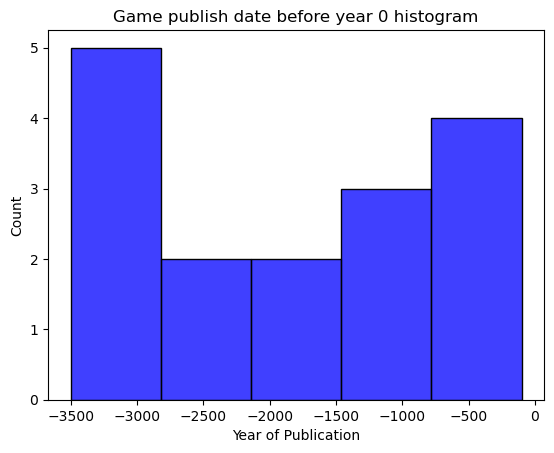

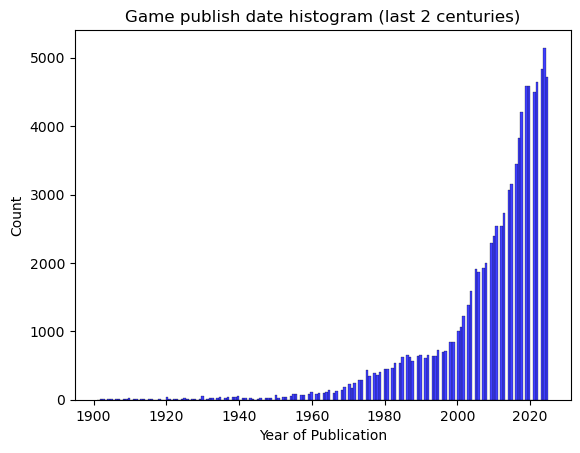

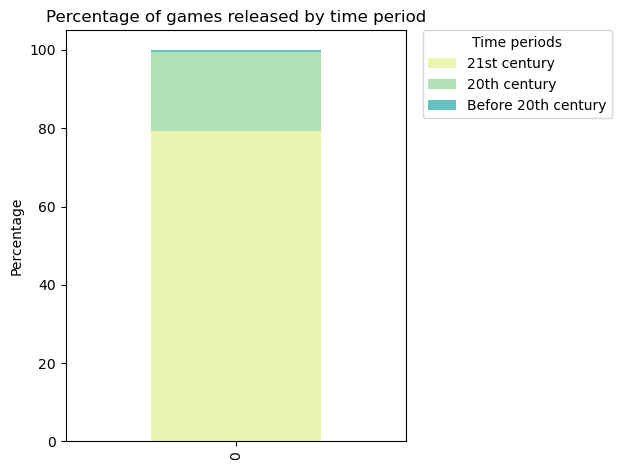

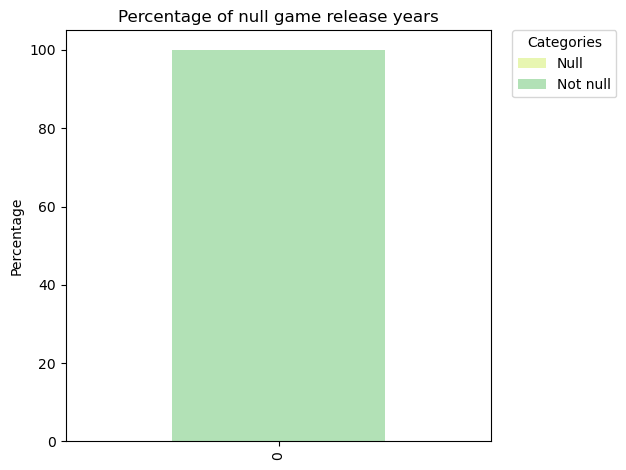

In [48]:
print(f'The column \'yearpublished\' has {df[df["yearpublished"].isna()].shape[0] + df[df["yearpublished"] == 0].shape[0]} missing values.')
print(f'The column \'yearpublished\' has {df[df["yearpublished"] > 2025].shape[0]} values after 2025. This means these games were not released for now.')
non_null_years_pub = df.loc[(df["yearpublished"].notna()) & (df["yearpublished"] != 0)]
sb.histplot(non_null_years_pub, x = "yearpublished", color = "blue")

plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date histogram")
plt.xticks(rotation = 90)
plt.show()

positive_years_pub = non_null_years_pub.loc[df["yearpublished"] > 0]
negative_years_pub = non_null_years_pub.loc[df["yearpublished"] < 0]
recent_releases = non_null_years_pub.loc[df["yearpublished"] > 1900]
sb.histplot(positive_years_pub, x = "yearpublished", color = "blue")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date after year 0 histogram")
plt.show()
sb.histplot(negative_years_pub, x = "yearpublished", color = "blue")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date before year 0 histogram")
plt.show()
sb.histplot(recent_releases, x = "yearpublished", color = "blue")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date histogram (last 2 centuries)")
plt.show()


counts = pd.Series({
    "21st century": (df["yearpublished"] > 2000).sum(),
    "20th century": ((df["yearpublished"] > 1900) & (df["yearpublished"] <= 2000)).sum(),
    "Before 20th century" : (df["yearpublished"] <= 1900).sum()
})
percentages = counts / counts.sum() * 100
year_percentage =  pd.DataFrame([percentages])
year_percentage.plot(
    kind="bar", stacked=True, color=sb.color_palette("YlGnBu")
)
plt.ylabel("Percentage")
plt.title("Percentage of games released by time period")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title = "Time periods")
plt.tight_layout()

counts = pd.Series({
    "Null": ((df["yearpublished"].isna() ) | (df["yearpublished"] == 0)).sum(),
    "Not null": (df["yearpublished"].notna() & (df["yearpublished"] != 0)).sum()
})
percentages = counts / counts.sum() * 100
null_year_percentage =  pd.DataFrame([percentages])
null_year_percentage.plot(
    kind="bar", stacked=True, color=sb.color_palette("YlGnBu")
)
plt.ylabel("Percentage")
plt.title("Percentage of null game release years")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title = "Categories")
plt.tight_layout()


In [49]:
invalid_description = df.loc[df["description"].isna() | (df["description"].str.strip() == "")]
print(f'There are {invalid_description.shape[0]} null descriptions')

There are 0 null descriptions


In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import html

#Remove unicode characters
clean_description = df["description"].apply(lambda x: html.unescape(str(x)))

cv = CountVectorizer(stop_words='english') 
word_count_vector = cv.fit_transform([" ".join(clean_description)])

tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)
feature_names = cv.get_feature_names_out()

doc = X[0]
scores = zip(doc.indices, doc.data)

# Sort by TF-IDF score
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

# Get top N words
top_n = 10
top_keywords = [(feature_names[idx], round(score, 3)) for idx, score in sorted_scores[:top_n]]

print(top_keywords)



[('game', np.float64(0.588)), ('player', np.float64(0.348)), ('players', np.float64(0.342)), ('cards', np.float64(0.324)), ('card', np.float64(0.223)), ('play', np.float64(0.145)), ('board', np.float64(0.113)), ('points', np.float64(0.112)), ('turn', np.float64(0.103)), ('dice', np.float64(0.08))]


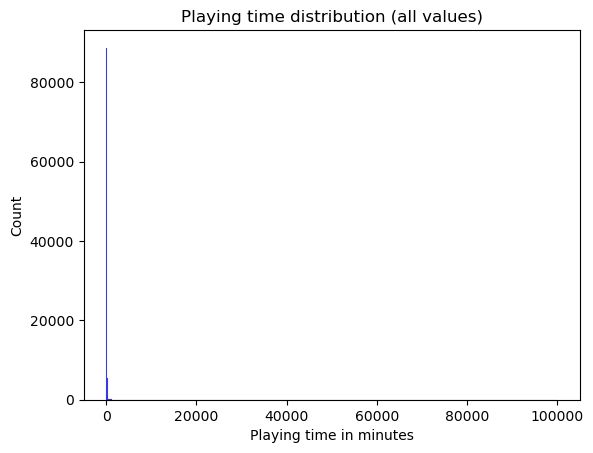

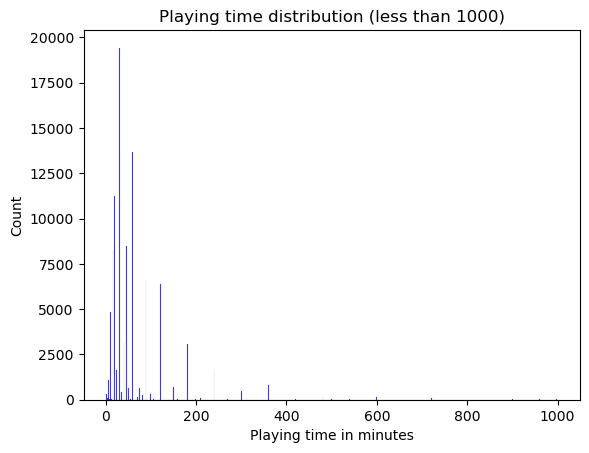

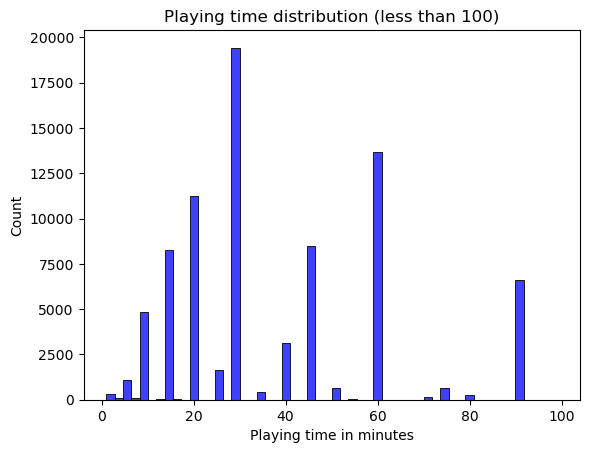

Maximum playing time is 100000
There are 0 null playing times
There are 262 extreme playing times (more than 1000 minutes)


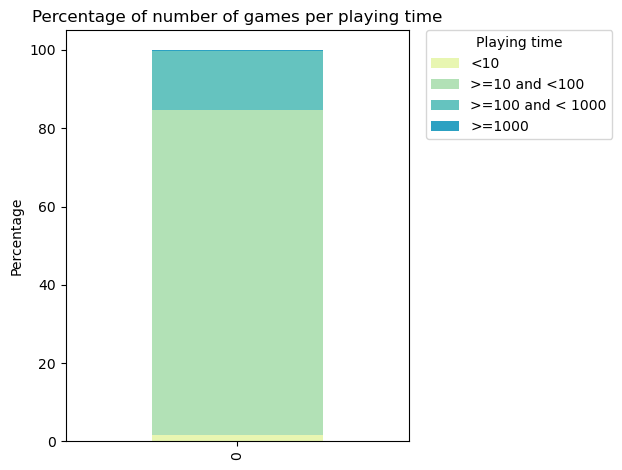

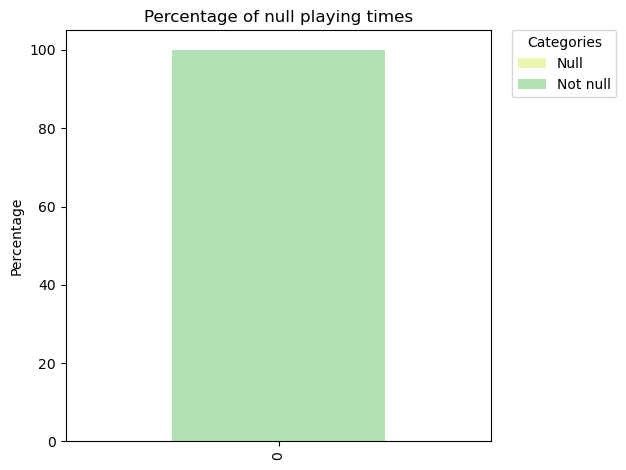

In [51]:
null_playingtime = df[(df["playingtime"] == 0) | (df["playingtime"].isna())]
non_null_playingtime = df.loc[(df["playingtime"] != 0) & df["playingtime"].notna()]
less_than_1000_playingtime = non_null_playingtime.loc[non_null_playingtime["playingtime"] < 1000]
less_than_100_playingtime = non_null_playingtime.loc[non_null_playingtime["playingtime"] < 100]

sb.histplot(non_null_playingtime, x = "playingtime", color = "blue")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (all values)")
plt.show()

sb.histplot(less_than_1000_playingtime, x = "playingtime", color = "blue")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 1000)")
plt.show()

sb.histplot(less_than_100_playingtime, x = "playingtime", color = "blue")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 100)")
plt.show()

counts = pd.Series({
    "<10": (non_null_playingtime["playingtime"] < 10).sum(),
    ">=10 and <100": ((non_null_playingtime["playingtime"] >= 10) & (non_null_playingtime["playingtime"] < 100)).sum(),
    ">=100 and < 1000": ((non_null_playingtime["playingtime"] >= 100) & (non_null_playingtime["playingtime"] < 1000)).sum(),
    ">=1000": ((non_null_playingtime["playingtime"] >= 1000)).sum()
})
percentages = counts / counts.sum() * 100
max_players_percentage =  pd.DataFrame([percentages])
max_players_percentage.plot(
    kind="bar", stacked=True, color=sb.color_palette("YlGnBu")
)
plt.ylabel("Percentage")
plt.title("Percentage of number of games per playing time")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title = "Playing time")
plt.tight_layout()

counts = pd.Series({
    "Null": ((df["playingtime"].isna() ) | (df["playingtime"] == 0)).sum(),
    "Not null": (df["playingtime"].notna() & (df["playingtime"] != 0)).sum()
})
percentages = counts / counts.sum() * 100
null_time_percentage =  pd.DataFrame([percentages])
null_time_percentage.plot(
    kind="bar", stacked=True, color=sb.color_palette("YlGnBu")
)
plt.ylabel("Percentage")
plt.title("Percentage of null playing times")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title = "Categories")
plt.tight_layout()


print(f'Maximum playing time is {max(df["playingtime"])}')
print(f'There are {null_playingtime.shape[0]} null playing times')
print(f'There are {non_null_playingtime.loc[non_null_playingtime["playingtime"] > 1000].shape[0]} extreme playing times (more than 1000 minutes)')

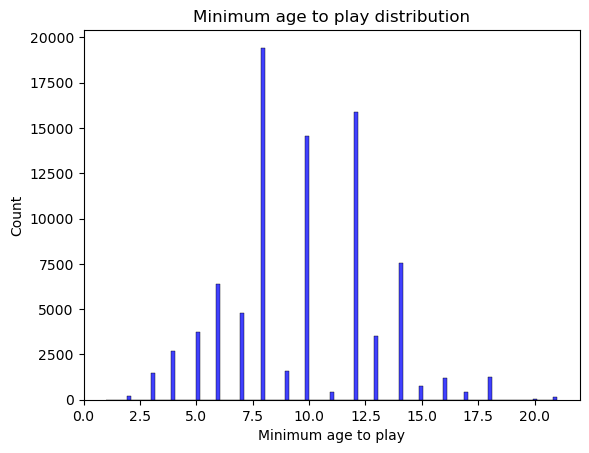

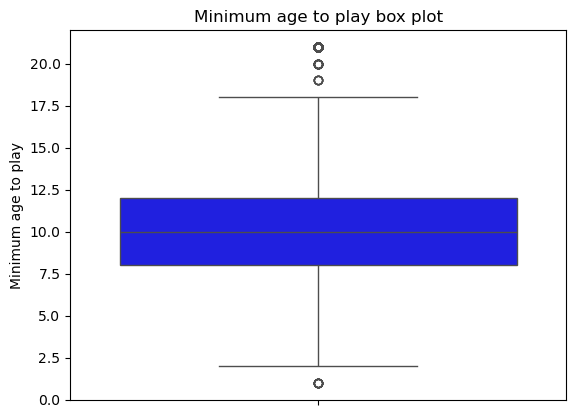

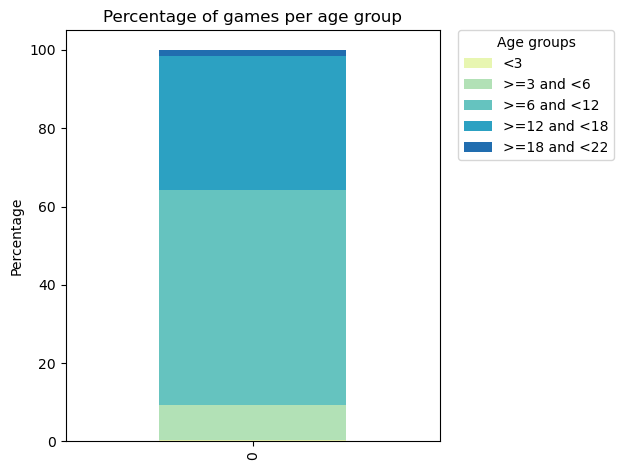

Maximum minimum age to play is 21
There are 10166 null minimum ages to play
There are 0 extreme minimum ages to play (more than 100 years old)


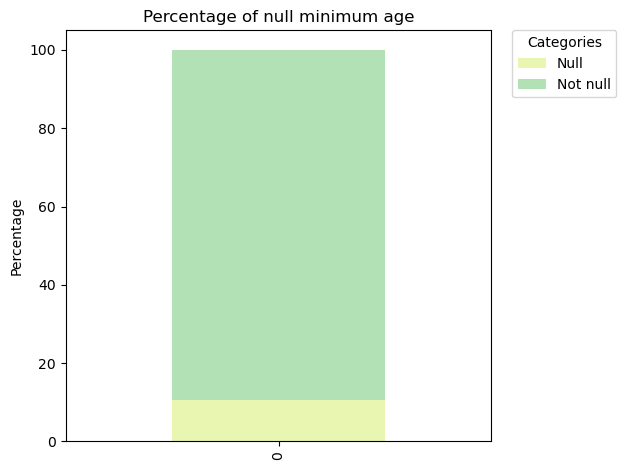

In [52]:
# Next we will analyze the minage column refering to the lowest age allowed for someone to play that boardgame.

# Next we will analyze the minage column refering to the lowest age allowed for someone to play that boardgame.

null_minage = df[(df["minage"] == 0) | (df["minage"].isna())]
non_null_minage = df.loc[(df["minage"] != 0) & df["minage"].notna()]
sb.histplot(non_null_minage, x = "minage", color = "blue")
plt.xlabel("Minimum age to play")
plt.ylabel("Count")
plt.title("Minimum age to play distribution")
plt.show()

sb.boxplot(non_null_minage, y = "minage", color = "blue")
plt.ylabel("Minimum age to play")
plt.title("Minimum age to play box plot")
plt.show()

counts = pd.Series({
    "<3": (non_null_minage["minage"] < 3).sum(),
    ">=3 and <6": ((non_null_minage["minage"] >=3) & (non_null_minage["minage"] < 6)).sum(),
    ">=6 and <12": ((non_null_minage["minage"] >=6) & (non_null_minage["minage"] < 12)).sum(),
    ">=12 and <18": ((non_null_minage["minage"] >=12) & (non_null_minage["minage"] < 18)).sum(),
    ">=18 and <22": ((non_null_minage["minage"] >= 18) & (non_null_minage["minage"] < 22)).sum(),
})
percentages = counts / counts.sum() * 100
min_age_percentage =  pd.DataFrame([percentages])
min_age_percentage.plot(
    kind="bar", stacked=True, color=sb.color_palette("YlGnBu")
)
plt.ylabel("Percentage")
plt.title("Percentage of games per age group")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title = "Age groups")
plt.tight_layout()
plt.show()

counts = pd.Series({
    "Null": ((df["minage"].isna() ) | (df["minage"] == 0)).sum(),
    "Not null": (df["minage"].notna() & (df["minage"] != 0)).sum()
})
percentages = counts / counts.sum() * 100
null_minage_percentage =  pd.DataFrame([percentages])
null_minage_percentage.plot(
    kind="bar", stacked=True, color=sb.color_palette("YlGnBu")
)
plt.ylabel("Percentage")
plt.title("Percentage of null minimum age")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title = "Categories")
plt.tight_layout()

print(f'Maximum minimum age to play is {max(df["minage"])}')
print(f'There are {null_minage.shape[0]} null minimum ages to play')
print(f'There are {non_null_minage.loc[non_null_minage["minage"] > 100].shape[0]} extreme minimum ages to play (more than 100 years old)')


There are 0 null publishers
There are 33925 unique publishers
The publisher with the most games is (Self-Published) with 6705 games


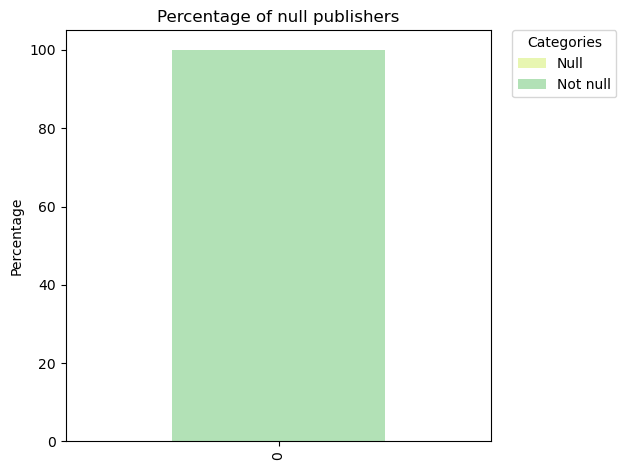

In [53]:
null_publishers = df[df["publishers"].isna() | (df["publishers"].str.strip() == "")]
print(f'There are {null_publishers.shape[0]} null publishers')
print(f'There are {df["publishers"].nunique()} unique publishers')
print(f'The publisher with the most games is {df["publishers"].value_counts().idxmax()} with {df["publishers"].value_counts().max()} games')

counts = pd.Series({
    "Null": ((df["publishers"].isna() )).sum(),
    "Not null": (df["publishers"].notna()).sum()
})
percentages = counts / counts.sum() * 100
null_pub_percentage =  pd.DataFrame([percentages])
null_pub_percentage.plot(
    kind="bar", stacked=True, color=sb.color_palette("YlGnBu")
)
plt.ylabel("Percentage")
plt.title("Percentage of null publishers")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title = "Categories")
plt.tight_layout()

The column 'categories' has 0 missing values.


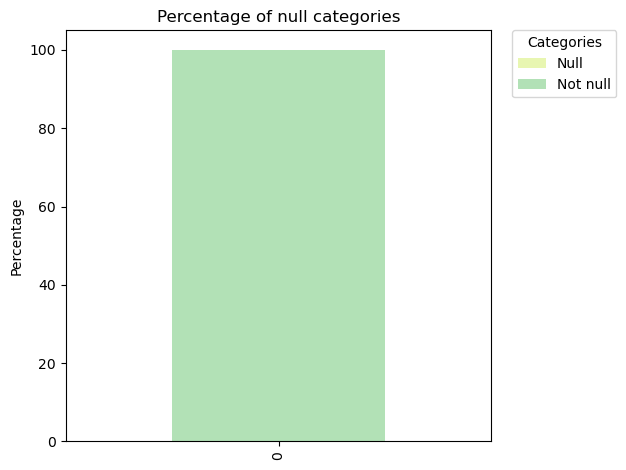

In [54]:
print(f'The column \'categories\' has {df[df["categories"].isna() | (df["categories"].str.strip() == "")].shape[0]} missing values.')

#categories
counts = pd.Series({
    "Null": ((df["categories"].isna() )).sum(),
    "Not null": (df["categories"].notna()).sum()
})
percentages = counts / counts.sum() * 100
null_cat_percentage =  pd.DataFrame([percentages])
null_cat_percentage.plot(
    kind="bar", stacked=True, color=sb.color_palette("YlGnBu")
)
plt.ylabel("Percentage")
plt.title("Percentage of null categories")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, title = "Categories")
plt.tight_layout()